LOAN STATUS PREDICTION

In [413]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

In [414]:
loan=pd.read_csv('loan_status_prediction.tsv',sep='\t')
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [415]:
df=pd.DataFrame(loan)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [416]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [417]:
#separating object dtypes from float and int
cat=[]
cont=[]
for i in df.columns:
    if(df[i].dtypes=='object'):
        cat.append(i)
    else:
        cont.append(i)
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [418]:
cont

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [419]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Doing some visualization on the continous(cont) columns and checking for missing values

In [420]:
df[cont].isnull().sum()
    

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [421]:
df[cat].isnull().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [422]:
#checking the cardinality of the categorical features
for i in df[cat]:
    print(i,df[i].nunique())

Loan_ID 614
Gender 2
Married 2
Dependents 4
Education 2
Self_Employed 2
Property_Area 3
Loan_Status 2


SOME VISUALIZATION BEFORE HANDLING THE MISSING DATA

In [423]:
df[cont].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

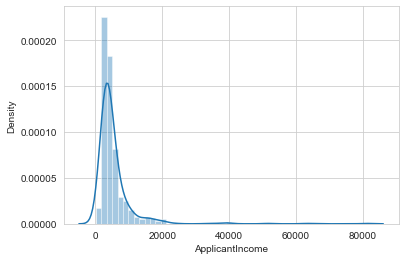

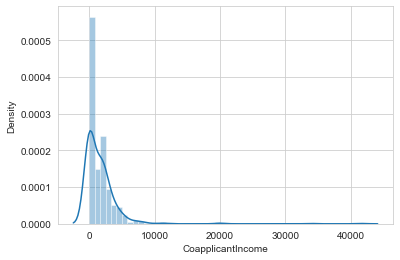

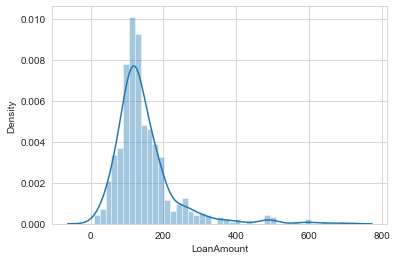

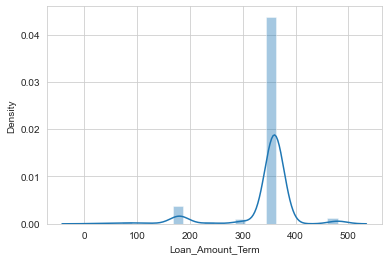

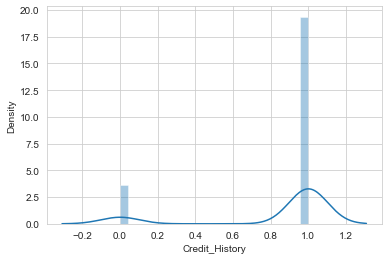

In [424]:
for i in df[cont]:
    sns.distplot(df[i])
    plt.show()

REPLACING THE MISSING VALUES BY THE MEAN OF THE RESPECTIVE COLUMNS

In [425]:
from sklearn.impute import SimpleImputer
for i in cont:
    imp=SimpleImputer(missing_values=np.NaN,strategy='mean')
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))
    


In [426]:
df[cont].isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

REPLACING THE CATEGORICAL COLUMS WITH THE ONES THAT HAVE HIGHEST NUMBER OF FREQUENCY

In [427]:
for i in cat:
    imp=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))
    

In [428]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

CHECKING FOR OUTLIERS IN THE CONTINOUS FEATURES

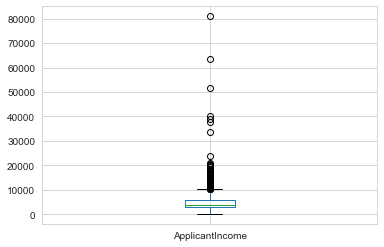

ApplicantIncome


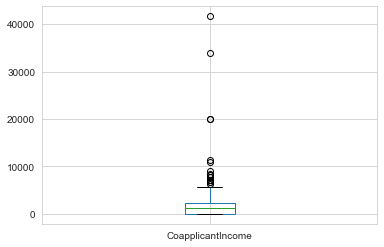

CoapplicantIncome


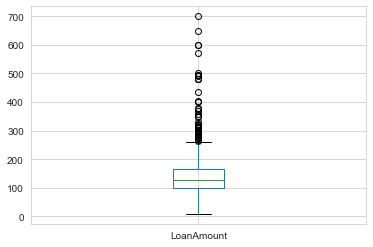

LoanAmount


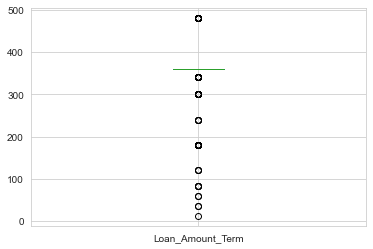

Loan_Amount_Term


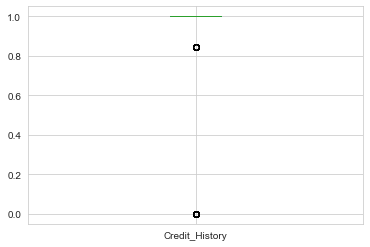

Credit_History


In [429]:
for i in cont:
    df.boxplot(i)
    plt.show()
    print(i)
    

REMOVING OUTLIERS

In [430]:
from scipy.stats import zscore
z=np.abs(zscore(df[cont]))
z

array([[0.07299082, 0.55448733, 0.        , 0.27985054, 0.45164045],
       [0.13441195, 0.03873155, 0.21927331, 0.27985054, 0.45164045],
       [0.39374734, 0.55448733, 0.957641  , 0.27985054, 0.45164045],
       ...,
       [0.43717437, 0.47240418, 1.26937121, 0.27985054, 0.45164045],
       [0.35706382, 0.55448733, 0.4833669 , 0.27985054, 0.45164045],
       [0.13441195, 0.55448733, 0.15972753, 0.27985054, 2.41044061]])

<AxesSubplot:>

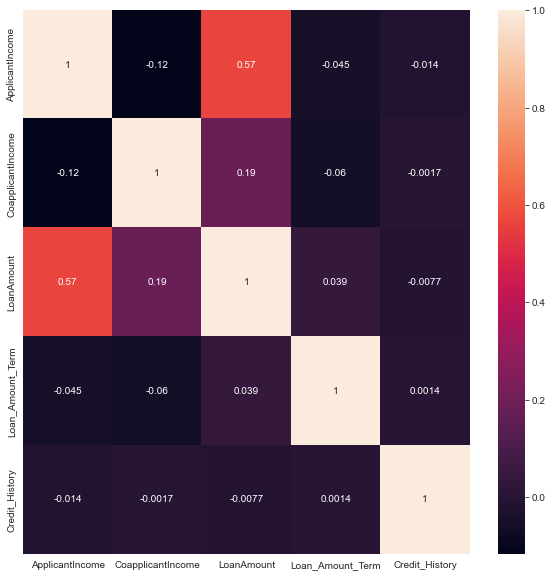

In [431]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

REMOVING SKEWNESS BEFORE CHECKING THE ZSCORE AGAIN

In [432]:
df[cont].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [433]:
#using square root transformation for the positively skewed columns
list1=['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in list1:
    df[i]=np.sqrt(df[i])

In [434]:
df[cont].skew()

ApplicantIncome      2.967286
CoapplicantIncome    0.979561
LoanAmount           1.314162
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [435]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [436]:
df[cont].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,76.478755,0.000000,12.100089,360.0,1.0
1,67.697858,38.832976,11.313708,360.0,1.0
2,54.772256,0.000000,8.124038,360.0,1.0
3,50.823223,48.559242,10.954451,360.0,1.0
4,77.459667,0.000000,11.874342,360.0,1.0


<AxesSubplot:>

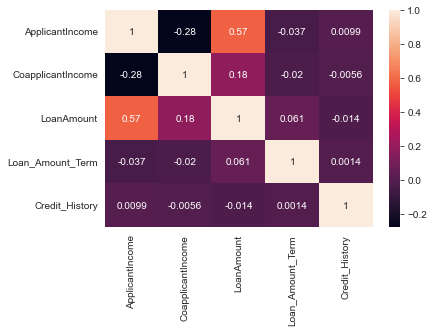

In [437]:
sns.heatmap(df.corr(),annot=True)

In [438]:
z=np.abs(zscore(df[cont]))
z.max()

8.10185867404502

In [439]:
threshold=3
print(np.where(z>3))


(array([ 14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 183, 185,
       242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417, 443, 487,
       495, 497, 506, 523, 546, 561, 575, 581, 585, 600, 604], dtype=int64), array([3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2, 2, 1,
       0, 1, 0, 2, 3, 3, 2, 2, 3, 2, 3, 1, 3, 1, 2], dtype=int64))


In [440]:
df=df[(z<3).all(axis=1)]
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,76.478755,0.000000,12.100089,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,67.697858,38.832976,11.313708,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,54.772256,0.000000,8.124038,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,50.823223,48.559242,10.954451,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,77.459667,0.000000,11.874342,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,53.851648,0.000000,8.426150,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,64.078077,0.000000,6.324555,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,89.844310,15.491933,15.905974,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,87.080423,0.000000,13.674794,360.0,1.0,Urban,Y


<AxesSubplot:>

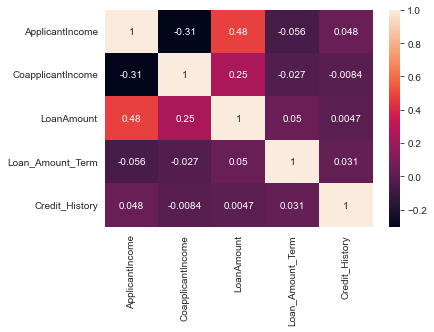

In [441]:
sns.heatmap(df[cont].corr(),annot=True)

In [442]:
df[cont].skew()

ApplicantIncome      1.217778
CoapplicantIncome    0.238523
LoanAmount           0.445579
Loan_Amount_Term    -2.085132
Credit_History      -1.930333
dtype: float64

ANALYSING  THE CATEGORICAL DATA 

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#for i in cat:
 #   df[i]=le.fit_transform(df[i])

In [443]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,76.478755,0.000000,12.100089,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,67.697858,38.832976,11.313708,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,54.772256,0.000000,8.124038,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,50.823223,48.559242,10.954451,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,77.459667,0.000000,11.874342,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

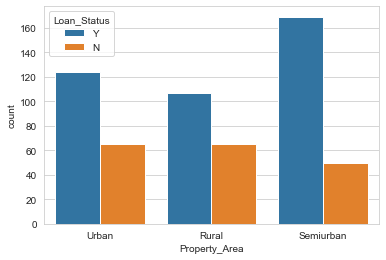

In [444]:
sns.set_style('whitegrid')
sns.countplot(hue='Loan_Status',x='Property_Area',data=df)

The semiurban areas have the most number of loans alotted(Y) and the least number of rejections(N).

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

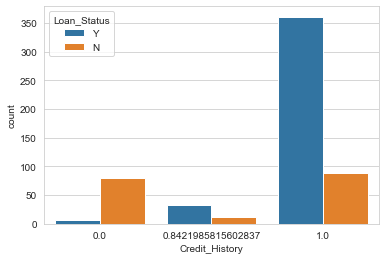

In [445]:
sns.set_style('whitegrid')
sns.countplot(hue='Loan_Status',x='Credit_History',data=df)

People with credit score of 1 have the most acceptance and the others have acceptance in the descending order.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

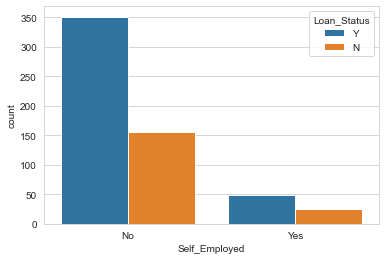

In [446]:
sns.set_style('whitegrid')
sns.countplot(hue='Loan_Status',x='Self_Employed',data=df)

MOST OF THE PEOPLE OF WHO'S APPLICATION STATUS WAS ACCEPTED(Y) WERE NOT SELF EMPLOYED.

<AxesSubplot:xlabel='Education', ylabel='count'>

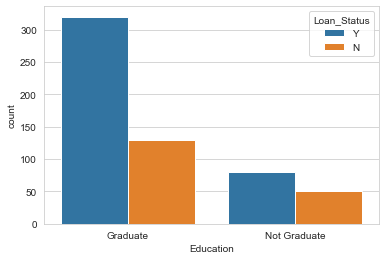

In [447]:
sns.set_style('whitegrid')
sns.countplot(hue='Loan_Status',x='Education',data=df)

MOST PEOPLE(around 345) WHO HAD A LOAN STATUS AS 'YES' WERE GRADUATES.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

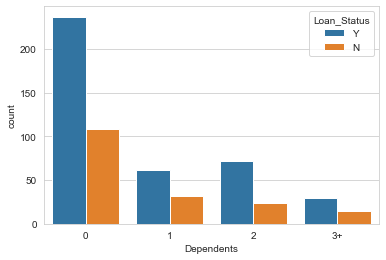

In [448]:
sns.set_style('whitegrid')
sns.countplot(hue='Loan_Status',x='Dependents',data=df)

MOST OF THE PEOPLE WHO HAD A LOAN STATUS OF 'YES' HAD NO DEPENDENTS.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

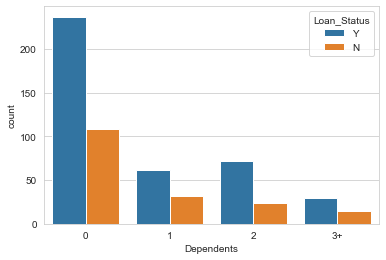

In [449]:
sns.set_style('whitegrid')
sns.countplot(hue='Loan_Status',x='Dependents',data=df)

MARRIED PEOPLE CONSTITUTE MOST OF THE 'APPROVED LOAN STATUS' CANDIDATES.

<AxesSubplot:xlabel='Gender', ylabel='count'>

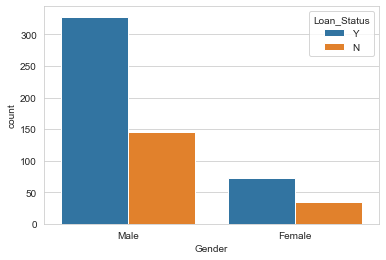

In [450]:
sns.set_style('whitegrid')
sns.countplot(hue='Loan_Status',x='Gender',data=df)

THE MALE TO FEMALE LOAN APPROVAL(Y) RATIO WAS AROUND 345:75.THEREFORE MEN CAN BE MORE LIKELY TO GET A LOAN STATUS AS 'YES' THAN WOMEN.

In [451]:
for i in cont:
    print(i,df[i].nunique())

ApplicantIncome 477
CoapplicantIncome 275
LoanAmount 188
Loan_Amount_Term 6
Credit_History 3


In [452]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

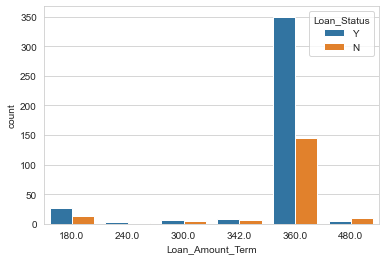

In [453]:
sns.set_style('whitegrid')
sns.countplot(hue='Loan_Status',x='Loan_Amount_Term',data=df)

THE LOAN_AMOUNT_TERM OF 360 HAD A SIGNIFICANTLY HIGH NUMBER OF LOAN STATUS AS 'YES' THAN ALL THE OTHER TERMS COMBINED.
SO APPLYING FOR A TERM 0F 360 HAS A LOT HIGHER CHANCES OF APPROVAL THAN ANY OTHER LOAN_AMOUNT_TERM.

PROCEEDING TO ENCODING THE CATEGORICAL DATA

In [454]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat:
    df[i]=le.fit_transform(df[i])

In [455]:
for i in cat[1:]:
    print(i,df[i].unique())

Gender [1 0]
Married [0 1]
Dependents [0 1 2 3]
Education [0 1]
Self_Employed [0 1]
Property_Area [2 0 1]
Loan_Status [1 0]


In [456]:
#dropping the original Loan_ID column
df.drop('Loan_ID',axis=1,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,76.478755,0.000000,12.100089,360.0,1.0,2,1
1,1,1,1,0,0,67.697858,38.832976,11.313708,360.0,1.0,0,0
2,1,1,0,0,1,54.772256,0.000000,8.124038,360.0,1.0,2,1
3,1,1,0,1,0,50.823223,48.559242,10.954451,360.0,1.0,2,1
4,1,0,0,0,0,77.459667,0.000000,11.874342,360.0,1.0,2,1


PROCEEDING TO THE MACHINE LEARNING PART

In [457]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

In [458]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [459]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [460]:
x.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [461]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

PROCEEDING TO MODEL TRAINING AND TESTING 

LOGISTIC REGRESSION

In [463]:
log=LogisticRegression()
log.fit(x_train,y_train)
pred_log=log.predict(x_test)
print('accuracy score',accuracy_score(y_test,pred_log))
print(confusion_matrix(y_test,pred_log))
print(classification_report(y_test,pred_log))

accuracy score 0.828125
[[ 23  33]
 [  0 136]]
              precision    recall  f1-score   support

           0       1.00      0.41      0.58        56
           1       0.80      1.00      0.89       136

    accuracy                           0.83       192
   macro avg       0.90      0.71      0.74       192
weighted avg       0.86      0.83      0.80       192



DECISION TREE CLASSIFIER

In [464]:
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_dtc))
print("confusion matrix:",confusion_matrix(y_test,pred_dtc))
print("classification report:",classification_report(y_test,pred_dtc))

accuracy_score: 0.7291666666666666
confusion matrix: [[ 31  25]
 [ 27 109]]
classification report:               precision    recall  f1-score   support

           0       0.53      0.55      0.54        56
           1       0.81      0.80      0.81       136

    accuracy                           0.73       192
   macro avg       0.67      0.68      0.68       192
weighted avg       0.73      0.73      0.73       192



RANDOM FOREST CLASSIFIER

In [469]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=15,criterion='entropy',random_state=42)
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_rfc))
print("confusion matrix:",confusion_matrix(y_test,pred_rfc))
print("classification report:",classification_report(y_test,pred_rfc))

accuracy_score: 0.8385416666666666
confusion matrix: [[ 26  30]
 [  1 135]]
classification report:               precision    recall  f1-score   support

           0       0.96      0.46      0.63        56
           1       0.82      0.99      0.90       136

    accuracy                           0.84       192
   macro avg       0.89      0.73      0.76       192
weighted avg       0.86      0.84      0.82       192



KNeighborsClassifier

In [474]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=5)
knc.fit(x_train,y_train)
pred_knc=knc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_knc))
print("confusion matrix:",confusion_matrix(y_test,pred_knc))
print("classification report:",classification_report(y_test,pred_knc))


accuracy_score: 0.6979166666666666
confusion matrix: [[ 11  45]
 [ 13 123]]
classification report:               precision    recall  f1-score   support

           0       0.46      0.20      0.28        56
           1       0.73      0.90      0.81       136

    accuracy                           0.70       192
   macro avg       0.60      0.55      0.54       192
weighted avg       0.65      0.70      0.65       192



SUPPORT VECTOR MACHINE

In [478]:
from sklearn.svm import SVC


    
svc2=SVC(kernel='linear')
svc2.fit(x_train,y_train)
pred_svc2=svc2.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_svc2))
print("confusion matrix:",confusion_matrix(y_test,pred_svc2))
print("classification report:",classification_report(y_test,pred_svc2))

accuracy_score: 0.828125
confusion matrix: [[ 23  33]
 [  0 136]]
classification report:               precision    recall  f1-score   support

           0       1.00      0.41      0.58        56
           1       0.80      1.00      0.89       136

    accuracy                           0.83       192
   macro avg       0.90      0.71      0.74       192
weighted avg       0.86      0.83      0.80       192



In [480]:
from sklearn.model_selection import cross_val_score

In [495]:
cv_1=cross_val_score(log,x,y,cv=5)
print("mean score:",cv_1.mean())
print("cross val score:",cv_1)

mean score: 0.8137931034482758
cross val score: [0.81034483 0.79310345 0.78448276 0.85344828 0.82758621]


In [485]:
cv_2=cross_val_score(knc,x,y,cv=10)
print("mean score:",cv_2.mean())
print("cross val score:",cv_2)

mean score: 0.6482758620689655
cross val score: [0.70689655 0.62068966 0.68965517 0.70689655 0.5862069  0.65517241
 0.65517241 0.51724138 0.67241379 0.67241379]


In [486]:
cv_3=cross_val_score(dtc,x,y,cv=10)
print("mean score:",cv_3.mean())
print("cross val score:",cv_3)

mean score: 0.7206896551724138
cross val score: [0.75862069 0.62068966 0.74137931 0.63793103 0.67241379 0.75862069
 0.77586207 0.74137931 0.74137931 0.75862069]


In [497]:
cv_4=cross_val_score(svc2,x,y,cv=10)
print("mean score:",cv_4.mean())
print("cross val score:",cv_4)

mean score: 0.8172413793103448
cross val score: [0.81034483 0.81034483 0.79310345 0.79310345 0.77586207 0.79310345
 0.86206897 0.86206897 0.79310345 0.87931034]


In [500]:
cv_5=cross_val_score(rfc,x,y,cv=10)
print("mean score:",cv_5.mean())
print("cross val score:",cv_5)

mean score: 0.7879310344827586
cross val score: [0.82758621 0.74137931 0.75862069 0.72413793 0.77586207 0.79310345
 0.84482759 0.79310345 0.77586207 0.84482759]


THE LOGISTIC REGRESSION AND THE SVC(KERNEL='LINEAR) PERFORMED THE BEST.
CHECKING THE ROC_AUC_CURVE TO DETERMINE WHICH ONE IS BETTER.

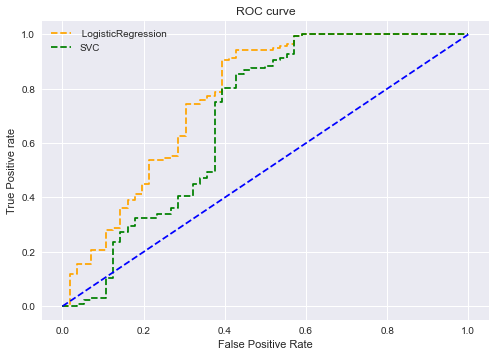

In [503]:
from sklearn.metrics import roc_curve
model1 = LogisticRegression()
# knn
model2 =SVC(kernel='linear',probability=True)


# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label=' LogisticRegression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='SVC')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

LOGISTIC REGRESSION DID A BETTER JOB IN CLASSIFYING POSITIVE CLASS IN THE DATASET

PROCEEDING TO SAVING THE MODEL

In [504]:
import pickle
filename2='loan_prediction.sav'
pickle.dump(log,open(filename2,'wb'))

LOADING THE MODEL AGAIN

In [505]:
load_model2=pickle.load(open(filename2,'rb'))
result=load_model2.score(x_train,y_train)
result

0.8118556701030928